Экономика городов. Иерархический кластерный анализ.

Шарифов Фаррух N33472

In [20]:
import numpy as np
import pandas as pd


import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [21]:
os.chdir("C:/Users/Farrukh99/Desktop/subjects/3/Data processing/lecture 3/Lab1")

In [41]:
df = pd.read_csv("Econom_Cities_data.csv", sep=';', decimal=',', index_col='City')


In [23]:
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

In [24]:
work = df['Work'].copy()
work['Cairo'] = None
work['Jakarta'] = None

mean = int(work.mean())
df['Work'] = work.fillna(mean)

salary = df['Salary'].copy()
salary['Cairo'] = None
salary['Jakarta'] = None

mean_s = int(salary.mean())
df['Salary'] = salary.fillna(mean_s)

df


,Work,Price,Salary
City,,,
Amsterdam,1714.0,65.6,49.0
Athens,1792.0,53.8,30.4
Bogota,2152.0,37.9,11.5
Bombay,2052.0,30.3,5.3
Brussels,1708.0,73.8,50.5
Buenos_Aires,1971.0,56.1,12.5
Cairo,1879.0,37.1,39.0
Caracas,2041.0,61.0,10.9
Chicago,1924.0,73.9,61.9


Стандартизация данных.

Так как они отличаются по смыслу и следовательно их значения различны на порядок.

In [42]:
from sklearn import preprocessing

norm = preprocessing.StandardScaler()
X = norm.fit_transform(df)
X = pd.DataFrame(X, index=df.index, columns=df.columns)

print(X)

                    Work     Price    Salary
City                                        
Amsterdam       0.138269 -0.151250  0.213212
Athens          0.171046 -0.698647  0.203941
Bogota          0.322325 -1.436242  0.194519
Bombay          0.280303 -1.788804  0.191429
Brussels        0.135748  0.229145  0.213960
Buenos_Aires    0.246266 -0.591951  0.195018
Cairo          -4.783750 -1.473354 -4.795489
Caracas         0.275681 -0.364642  0.194220
Chicago         0.226515  0.233784  0.219643
Copenhagen      0.139530  1.040964  0.220141
Dublin          0.157179  0.331203  0.209424
Dusseldorf      0.129445  0.447177  0.218795
Frankfurt       0.111375  0.261618  0.218895
Geneva          0.208026  1.254356  0.233799
Helsinki        0.118519  2.075453  0.221986
Hong_Kong       0.416034 -0.234751  0.202645
Houston         0.249207  0.141005  0.211866
Jakarta        -4.783750 -1.171821 -4.795489
Johannesburg    0.235340 -0.823899  0.200750
Kuala_Lumpur    0.328628 -1.176460  0.193722
Lagos     

Проводим иерархический кластерный анализ функцией linkage. Использем
метод вычисления расстояний между кластерами ward и метод вычисления
расстояний между объектами euclidean.

In [26]:
#  Строим дендрограмму
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(X, 'ward', 'euclidean')

In [27]:
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(47, 4)


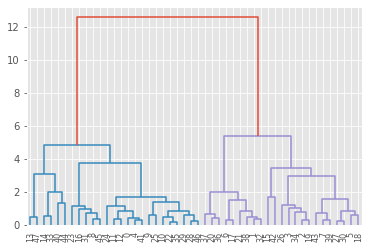

In [28]:
dn = dendrogram(link)

Определим какое количество кластеров оптимален.

Text(0, 0.5, 'Distance')

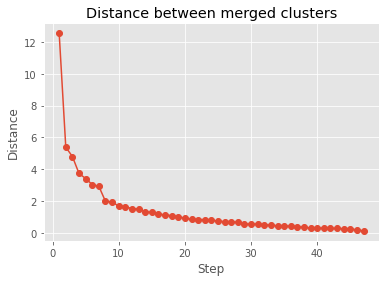

In [29]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

График каменистой осыпи не дал ощутимых результатов. Попробуем в ручную перебрать разное колчестов кластеров.

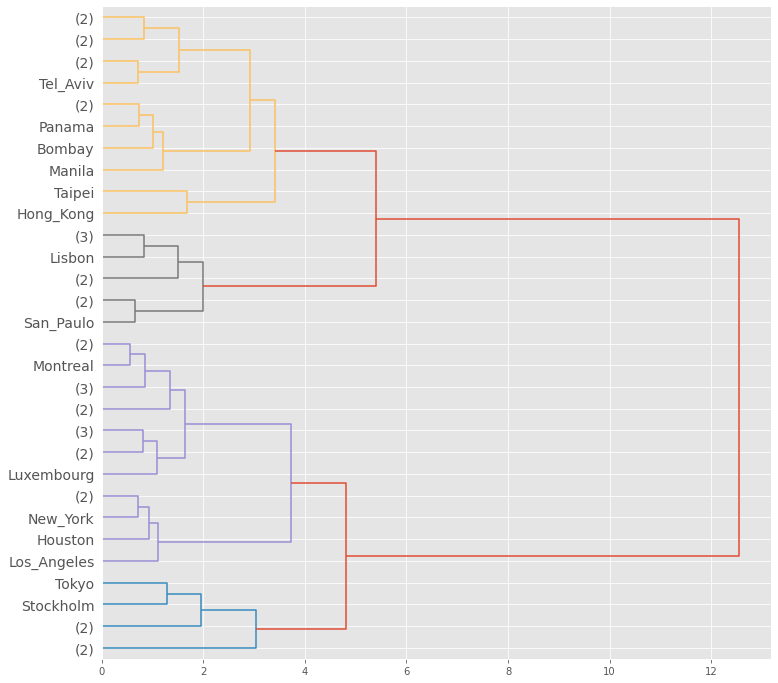

In [30]:
fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels = X.index.tolist(),
                leaf_font_size = 14, 
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=4,
                orientation = "right",
                leaf_rotation=0.)

Я предпочту ответ 4 кластера.
Переходим к интерпретации кластеров. Добавляем столбец cluster к таблице
данных.

In [31]:
df['cluster'] = fcluster(link, 4, criterion='distance')

In [32]:
print(df)

                  Work  Price  Salary  cluster
City                                          
Amsterdam       1714.0   65.6    49.0        2
Athens          1792.0   53.8    30.4        3
Bogota          2152.0   37.9    11.5        4
Bombay          2052.0   30.3     5.3        4
Brussels        1708.0   73.8    50.5        2
Buenos_Aires    1971.0   56.1    12.5        4
Cairo           1879.0   37.1    39.0        3
Caracas         2041.0   61.0    10.9        4
Chicago         1924.0   73.9    61.9        2
Copenhagen      1717.0   91.3    62.9        2
Dublin          1759.0   76.0    41.4        2
Dusseldorf      1693.0   78.5    60.2        2
Frankfurt       1650.0   74.5    60.4        2
Geneva          1880.0   95.9    90.3        1
Helsinki        1667.0  113.6    66.6        1
Hong_Kong       2375.0   63.8    27.8        4
Houston         1978.0   71.9    46.3        2
Jakarta         1879.0   43.6    39.0        3
Johannesburg    1945.0   51.1    24.0        4
Kuala_Lumpur 

Смотрим размеры и средние значения характеристик в каждом кластере

In [33]:
df.groupby('cluster').size()

cluster
1     6
2    19
3     9
4    14
dtype: int64

In [34]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1792.000000,77.526316,55.157895
3,1816.666667,48.588889,23.611111
4,2082.357143,53.121429,14.914286


In [35]:
df['cluster'].sort_values()

City
Zurich            1
Tokyo             1
Stockholm         1
Oslo              1
Geneva            1
Helsinki          1
Toronto           2
Sydney            2
Paris             2
New_York          2
Montreal          2
Milan             2
Madrid            2
Luxembourg        2
Vienna            2
London            2
Amsterdam         2
Los_Angeles       2
Brussels          2
Frankfurt         2
Dusseldorf        2
Dublin            2
Houston           2
Copenhagen        2
Chicago           2
Athens            3
Seoul             3
San_Paulo         3
Rio_de_Janeiro    3
Cairo             3
Jakarta           3
Nicosia           3
Lisbon            3
Lagos             3
Johannesburg      4
Bogota            4
Tel_Aviv          4
Taipei            4
Bombay            4
Kuala_Lumpur      4
Caracas           4
Hong_Kong         4
Buenos_Aires      4
Panama            4
Manila            4
Mexico_City       4
Nairobi           4
Singpore          4
Name: cluster, dtype: int32

Будем классифицировать данные на 2 кластера, так как если более чем 2 кластера их сложно классифицировать.

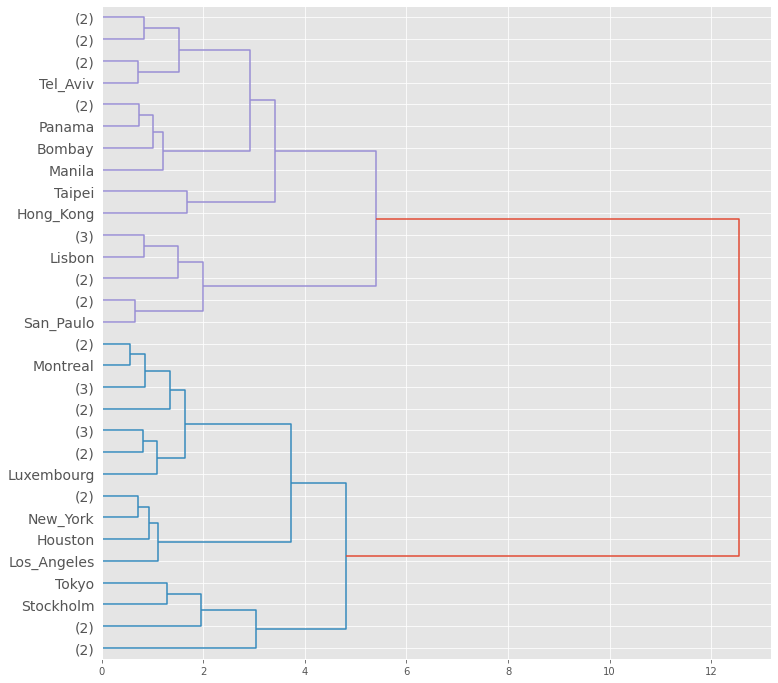

In [36]:
fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels = X.index.tolist(),
                leaf_font_size = 14, 
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=6,
                orientation = "right",
                leaf_rotation=0.)

In [37]:
df['cluster'] = fcluster(link, 6, criterion='distance')

In [38]:
df.groupby('cluster').size()

cluster
1    25
2    23
dtype: int64

In [39]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1789.240000,84.972000,59.032000
2,1978.391304,51.347826,18.317391


### ВЫВОД
Можно с уверенностью сказать о различии этих кластеров. 
Первый кластер это города в развитых страннах, с высоким уровнем жизни и ценой на эту жизнь.
Второй кластер это тоже большие города, но зарплаты в этих городах на парядок ниже чем у первого кластера.

In [40]:
df['cluster'].sort_values()

City
Amsterdam         1
Toronto           1
Tokyo             1
Sydney            1
Stockholm         1
Paris             1
Oslo              1
New_York          1
Montreal          1
Milan             1
Madrid            1
Luxembourg        1
Vienna            1
London            1
Houston           1
Los_Angeles       1
Helsinki          1
Brussels          1
Chicago           1
Copenhagen        1
Dublin            1
Dusseldorf        1
Frankfurt         1
Zurich            1
Geneva            1
Lisbon            2
Athens            2
Bogota            2
Tel_Aviv          2
Taipei            2
Bombay            2
Jakarta           2
Singpore          2
Seoul             2
San_Paulo         2
Rio_de_Janeiro    2
Buenos_Aires      2
Cairo             2
Nicosia           2
Hong_Kong         2
Nairobi           2
Johannesburg      2
Kuala_Lumpur      2
Mexico_City       2
Manila            2
Lagos             2
Panama            2
Caracas           2
Name: cluster, dtype: int32